##### Import libary

In [1]:
import kaos
import numpy as np
import pandas as pd
from Bio import SeqIO
import time
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt

In [54]:
# help(kaos.kaos_fcgr)

In [3]:
kaosr = importr('kaos')
seqinr = importr('seqinr')

##### fasta file path

In [4]:
file_path_ecoli = "GCF_000005845.2_ASM584v2_genomic.fna"

In [5]:
def return_r_character_array(python_string):
    
    import rpy2.robjects as robjects

    r_char_array = robjects.StrVector(list(python_string))

    return r_char_array

In [6]:
python_sequence_ecoli =    kaos.Read().read_fasta_removing_non_atgc(file_path_ecoli)
r_sequence  = return_r_character_array(python_sequence_ecoli)

In [7]:
def kaos_r(r_fasta_seq, k):

    start_time = time.time()
    x_cgr = kaosr.cgr(r_fasta_seq, res=k)
    end_time = time.time()

    return np.array(x_cgr.rx2('matrix')), (end_time - start_time)

In [8]:
def kaos_python(python_fasta_seq, kmer_length):
      
    chaos_game_kmer_array = kaos.kaos_fcgr().chaos_game_representation_key(kmer_length=kmer_length)
        
    start_time = time.time()
    
    fcgr_matrix = kaos.kaos_fcgr().chaos_frequency_matrix(fasta_string = python_fasta_seq, kmer_length= kmer_length, chaos_game_kmer_array= chaos_game_kmer_array, pseudo_count= False)[0]

    end_time = time.time()
    
    print("Time taken: " + str(end_time - start_time))
    
    return fcgr_matrix, (end_time - start_time)
    

##### block to obtain correlation and time consumed

In [10]:
time_python = list()
time_r = list()
# corr_r = list()
corr_list = list()

for i in [1,2,3,4,5, 6,7,8,9, 10]:
# for i in [1,2]:

    fcgr_ecoli, python_time = kaos_python(python_sequence_ecoli, kmer_length = i)
    r_fcgr_ecoli, r_time = kaos_r(r_sequence, k =2**i)
    time_python.append(python_time)
    time_r.append(r_time)
    print("Current kmer length is ", str(i))
    print(r_fcgr_ecoli.shape, fcgr_ecoli.shape)
    print("The correlation coefficient for ecoli is ",    str(np.round(pd.Series(r_fcgr_ecoli.ravel()).corr(pd.Series(fcgr_ecoli.ravel())),3)))
    corr_list.append(np.round(pd.Series(r_fcgr_ecoli.ravel()).corr(pd.Series(fcgr_ecoli.ravel())),3))
    print("_______")
    # break
    del fcgr_ecoli, r_fcgr_ecoli, r_time, python_time



Time taken: 0.5389103889465332
Current kmer length is  1
(2, 2) (2, 2)
The correlation coefficient for ecoli is  1.0
_______
Time taken: 0.6383998394012451
Current kmer length is  2
(4, 4) (4, 4)
The correlation coefficient for ecoli is  0.377
_______
Time taken: 0.6434497833251953
Current kmer length is  3
(8, 8) (8, 8)
The correlation coefficient for ecoli is  0.27
_______
Time taken: 0.6679048538208008
Current kmer length is  4
(16, 16) (16, 16)
The correlation coefficient for ecoli is  0.258
_______
Time taken: 0.6967275142669678
Current kmer length is  5
(32, 32) (32, 32)
The correlation coefficient for ecoli is  0.234
_______
Time taken: 0.7445666790008545
Current kmer length is  6
(64, 64) (64, 64)
The correlation coefficient for ecoli is  0.226
_______
Time taken: 0.7871556282043457
Current kmer length is  7
(128, 128) (128, 128)
The correlation coefficient for ecoli is  0.217
_______
Time taken: 1.2616956233978271
Current kmer length is  8
(256, 256) (256, 256)
The correlation

In [15]:
corr_list

[1.0, 0.377, 0.27, 0.258, 0.234, 0.226, 0.217, 0.203, 0.181, 0.146]

In [52]:
time_python

[0.5389103889465332,
 0.6383998394012451,
 0.6434497833251953,
 0.6679048538208008,
 0.6967275142669678,
 0.7445666790008545,
 0.7871556282043457,
 1.2616956233978271,
 2.054769515991211,
 2.9050791263580322]

In [53]:
time_r

[111.40623903274536,
 110.19847440719604,
 110.06763863563538,
 109.62774634361267,
 111.75980591773987,
 113.02105259895325,
 110.68984603881836,
 111.58661937713623,
 110.13506054878235,
 114.55527687072754]

In [29]:
def custom_figure_axis(ax, fontsize=10, show_ticks = True):

    """
    Customize the appearance of matplotlib axis for a figure.

    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The axis to be customized.
        fontsize (int, optional): Font size for axis labels and ticks. Default is 10.
        show_ticks (bool, optional): Whether to display ticks and labels. Default is True.

    Returns:
        matplotlib.axes._subplots.AxesSubplot: The customized axis.
    """

    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['left'].set_linewidth(0.2)
    ax.tick_params(axis='x', labelsize=fontsize, rotation=0)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.tick_params(axis='both', which='both', width=0.5)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    
    if show_ticks==False:
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    return ax

##### graph for correlation vs kmer length

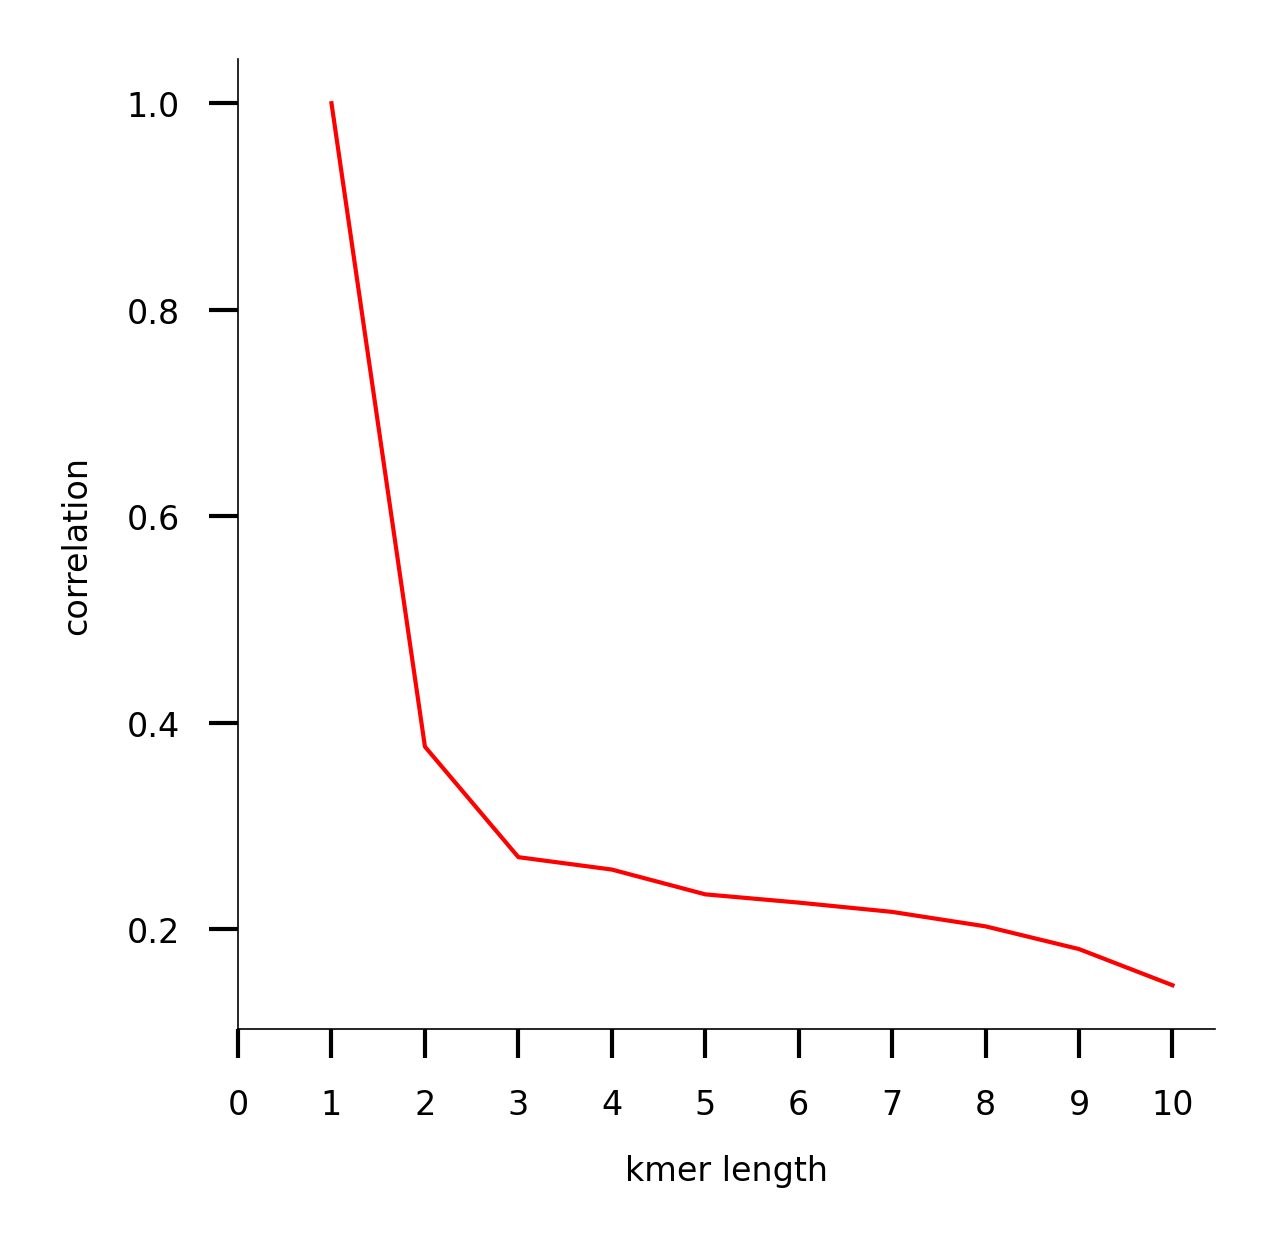

In [48]:
fig, ax = plt.subplots(1, 1, dpi = 600, figsize = (2.1, 2.1))

ax.plot(np.array(list(range(len(corr_list)))) + [1], corr_list, lw = 0.5, color = "red")
ax.set_xlabel("kmer length")
ax.set_ylabel("correlation")
ax = custom_figure_axis(ax, fontsize=4, show_ticks = True)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10])
plt.savefig("corr.pdf", dpi = 600)

##### graph for time taken vs kmer length

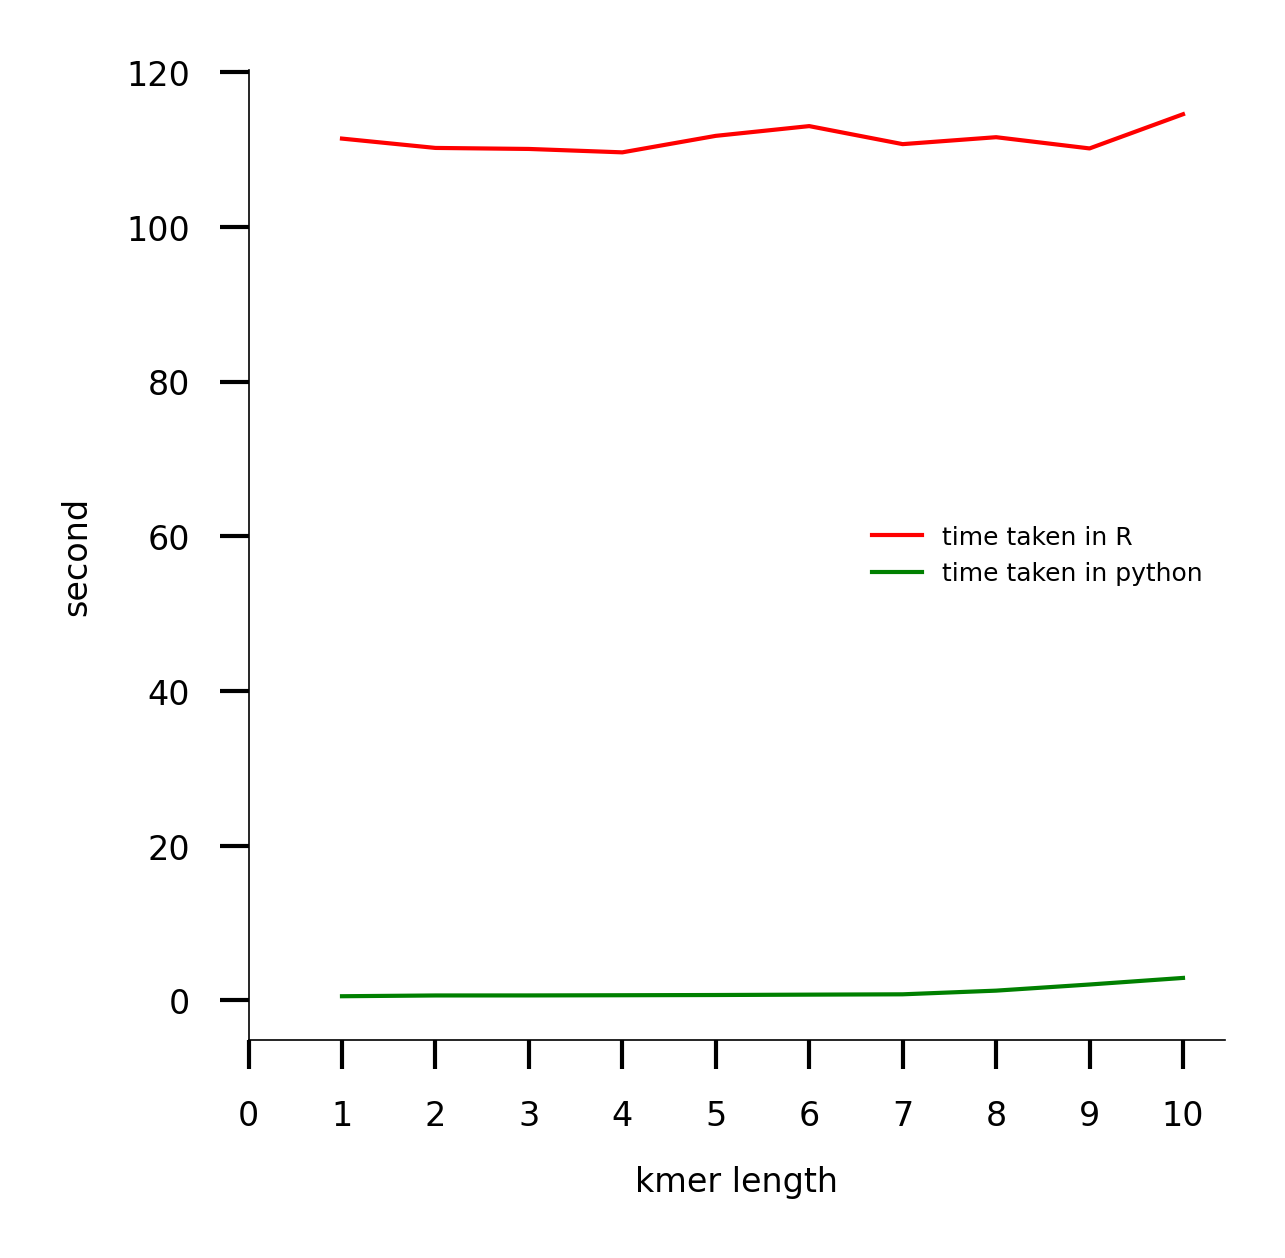

In [49]:
fig, ax = plt.subplots(1, 1, dpi = 600, figsize = (2.1, 2.1))

ax.plot(np.array(list(range(len(corr_list)))) + [1], time_r, lw = 0.5, color = "red", label = "time taken in R")
ax.plot(np.array(list(range(len(corr_list)))) + [1], time_python, lw = 0.5, color = "green", label = "time taken in python")

ax.set_xlabel("kmer length")
ax.set_ylabel("second")
ax = custom_figure_axis(ax, fontsize=4, show_ticks = True)
ax.legend(frameon=False, fontsize = 3)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10])
plt.savefig("time.pdf", dpi = 600)

In [50]:
# time_r

In [51]:
# time_python